In [1]:
##Same as figure 3 but for response prediction metrics

In [2]:
##Here we have code to replicate figures included in Figure 3 of main paper
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed'
os.makedirs(outdir, exist_ok = True)

In [3]:
base_path = '../../../results_metrics_aggregated_bme/response_pred_pcc'

In [4]:
##########
#Mechanistic baselines
##########
performance = {}

paths = glob(osp.join(base_path, 'baseline/within/baseline_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    #Keeps only WITHIN results
    df = df[df['cellline1'] == df['cellline2']]
    
    # Process the new DataFrame to update the dictionary
    method_name = 'Baseline'
    cellline = df['cellline1'].iloc[0]
    
    for topk in [10, 20, 40, 80]:
        for test_cell_line in df['cellline2'].unique():
            dfi = df[df['topk'] == topk]
            dfi = dfi[dfi['cellline2'] == test_cell_line]
            
            metric_data = {
                'R2 - (top {})'.format(topk): [dfi['r2'].mean()],

            }
            
            
            # Initialize nested dictionaries if not already present
            if test_cell_line not in performance:
                performance[test_cell_line] = {}
            
            for metric, value in metric_data.items():
                if metric not in performance[test_cell_line]:
                    performance[test_cell_line][metric] = {}
                if method_name not in performance[test_cell_line][metric]:
                    performance[test_cell_line][metric][method_name] = []
                performance[test_cell_line][metric][method_name] += value



In [5]:
##########
#Biolord
##########

paths = glob(osp.join(base_path, 'Biolord/within/biolord_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'Biolord'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [6]:
##########
#CellOT
##########

paths = glob(osp.join(base_path, 'cellOT/within/cellot_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'CellOT'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [7]:
##########
#ChemCPA
##########

paths = glob(osp.join(base_path, 'chemCPA/within/chemcpa_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'ChemCPA'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [8]:
##########
#scGen
##########

paths = glob(osp.join(base_path, 'scGEN/within/scgen_chemical_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'scGen'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [9]:
##########
#PDGrapher
##########

paths = glob(osp.join(base_path, 'PDGrapher/within/pdgrapher_chemical_r2_*_topk.csv'))

for path in paths:
    df = pd.read_csv(path)
    cellline = df['cellline1'].iloc[0]
    # Process the new DataFrame to update the dictionary
    method_name = 'PDGrapher'


    for topk in [10, 20, 40, 80]:
        dfi = df[df['topk'] == topk]
        metric_data = {
            'R2 - (top {})'.format(topk): dfi.groupby('split')['r2'].mean().reset_index()['r2'].tolist(),

        }
    
        # Initialize nested dictionaries if not already present
        if cellline not in performance:
            performance[cellline] = {}
        
        for metric, value in metric_data.items():
            if metric not in performance[cellline]:
                performance[cellline][metric] = {}
            if method_name not in performance[cellline][metric]:
                performance[cellline][metric][method_name] = []
            performance[cellline][metric][method_name] += value


In [10]:
# Delete 'HA1E' from the performance dictionary
if 'HA1E' in performance:
    del performance['HA1E']

In [11]:
performance['A375']['R2 - (top 10)'].keys()

dict_keys(['Baseline', 'Biolord', 'CellOT', 'ChemCPA', 'scGen', 'PDGrapher'])

In [12]:
cell_line_to_cancer_type = {
    'A549': 'Lung-A549',
    'A375': 'Skin-A375',
    'BT20': 'Breast-BT20',
    'HELA': 'Cervix-HELA',
    'HT29': 'Colon-HT29',
    'MCF7': 'Breast-MCF7',
    'MDAMB231': 'Breast-MDAMB231',
    'PC3': 'Prostate-PC3',
    'VCAP': 'Prostate-VCAP',
    'BICR6': 'Head-BICR6',
    'U251MG': 'Brain-U251MG',
    'YAPC': 'Pancreas-YAPC',
    'ES2': 'Ovary-ES2',
    'AGS': 'Stomach-AGS'
}

## Panel R2

/tmp/ipykernel_1869953/1828882180.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


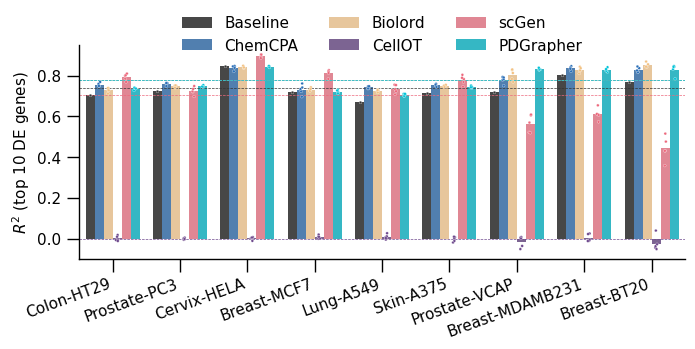

/tmp/ipykernel_1869953/1828882180.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


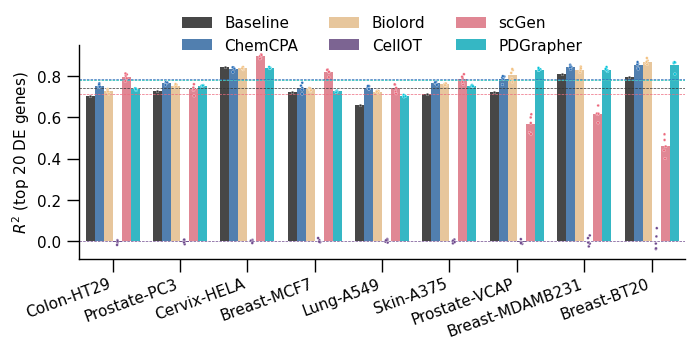

/tmp/ipykernel_1869953/1828882180.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


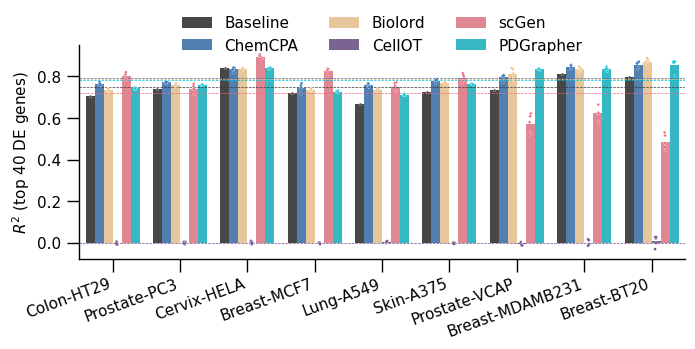

/tmp/ipykernel_1869953/1828882180.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)


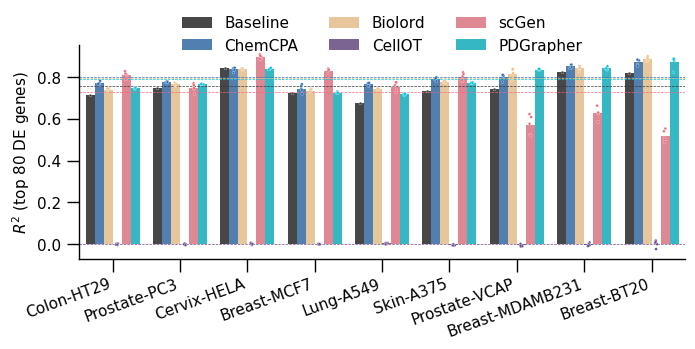

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

ytitles = {'R2 - (top 10)': ' (top 10 DE genes)', 'R2 - (top 20)': ' (top 20 DE genes)', 'R2 - (top 40)': ' (top 40 DE genes)', 'R2 - (top 80)': ' (top 80 DE genes)'}

for metric in ['R2 - (top 10)', 'R2 - (top 20)', 'R2 - (top 40)', 'R2 - (top 80)']:

    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, method, value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

    # Calculate the mean 'rankings' for each cell line and method
    df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()
    #Rename cell lines
    df['Cancer Type'] = df['Cell Line'].map(cell_line_to_cancer_type)
    df_mean['Cancer Type'] = df_mean['Cell Line'].map(cell_line_to_cancer_type)
    # Replace x-axis labels with cancer types
    df['Cell Line'] = df['Cancer Type']
    df_mean['Cell Line'] = df_mean['Cancer Type']
    # Order cell lines based on values for PDGrapher
    pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
    ordered_cell_lines = ['Colon-HT29', 'Prostate-PC3', 'Cervix-HELA', 'Breast-MCF7', 'Lung-A549', 'Skin-A375', 'Prostate-VCAP', 'Breast-MDAMB231', 'Breast-BT20'] #Same order as pert prediction

    # Reorder the DataFrame based on ordered cell lines
    df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
    df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

    

    # Define a color palette that matches the existing figures
    palette = {
        'Biolord': '#f3c283',
        'ChemCPA': '#2C70B9',
        'PDGrapher': '#04C4D9',
        'Cancer genes': '#636363',
        'Cancer targets': '#8C8C8C',
        'CellOT': '#6f4a8e',
        'Baseline': '#333333',
        'scGen': '#ED697D'
    }

    # Define the order of methods
    method_order = ['Baseline', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

    with sns.plotting_context(plotting_context):
        # Initialize the plot
        fig, ax = plt.subplots(figsize=(7.35, 3.4))


        # Create a bar plot for each method
        sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9)

        # Overlay individual data points
        sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2)






        # Add horizontal lines for the overall mean ranking for each method
        for method in method_order:
            overall_mean = df[df['Method'] == method][metric].mean()
            plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

        # Remove title
        plt.title('')
        # plt.ylim(-10, 10)

        # Remove X-axis label
        plt.xlabel('')
        sns.despine()

        # Adjust legend to only include the bars and place it at the top
        handles, labels = plt.gca().get_legend_handles_labels()
        bar_handles = handles[:len(method_order)]
        bar_labels = labels[:len(method_order)]
        plt.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3, frameon=False, title=None)
        plt.xticks(rotation=20, ha="right")
        plt.subplots_adjust(bottom=0.25, right=0.95)
        plt.ylabel(r'$R^2$' + ytitles[metric])
        plt.savefig(osp.join(outdir, 'panel_{}.pdf'.format(metric)))
        plt.show()




In [14]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from brokenaxes import brokenaxes


# # Extract the data for 'rankings' into a DataFrame
# metric = 'R2 - (top 80)'
# data = []
# for cellline, metrics in performance.items():
#     if metric in metrics:
#         for method, values in metrics[metric].items():
#             for value in values:
#                 data.append([cellline, method, value])

# # Create a DataFrame
# df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# # Calculate the mean 'rankings' for each cell line and method
# df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# # Order cell lines based on values for PDGrapher
# pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# # Reorder the DataFrame based on ordered cell lines
# df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
# df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# # Define a color palette that matches the existing figures
# palette = {
#     'Biolord': '#f3c283',
#     'ChemCPA': '#2C70B9',
#     'PDGrapher': '#04C4D9',
#     'Cancer genes': '#636363',
#     'Cancer targets': '#8C8C8C',
#     'CellOT': '#6f4a8e',
#     'Random': '#333333',
#     'scGen': '#ED697D'
# }

# # Define the order of methods
# method_order = ['Random', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']

# # Initialize the plot
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7.35, 3.4))
# fig.subplots_adjust(hspace=0.1)  # adjust space between Axes

# # Create a bar plot for each method
# sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9, ax = ax1)
# sns.barplot(data=df_mean[df_mean[metric] < -3], x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9, ax = ax2)


# # Overlay individual data points
# sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2, ax=ax1)
# sns.stripplot(data=df[df[metric] < -3], x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2, ax=ax2)

# ax1.set_ylim(-3, 1.)  # outliers only
# ax2.set_ylim(-7e8, -3)  # most of the data




# # Add horizontal lines for the overall mean ranking for each method
# # for method in method_order:
# #     overall_mean = df[df['Method'] == method][metric].mean()
# #     plt.axhline(y=overall_mean, linestyle='--', color=palette[method], linewidth=0.5)

# # Remove title
# plt.title('')

# # Remove X-axis label
# plt.xlabel('')
# sns.despine()



# # hide the spines between ax and ax2
# ax1.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()


# # Adjust legend to only include the bars and place it at the top
# handles, labels = plt.gca().get_legend_handles_labels()
# bar_handles = handles[:len(method_order)]
# bar_labels = labels[:len(method_order)]
# ax1.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 1.45), loc='upper center', ncol=4, frameon=False, title=None)
# ax2.legend_.remove()
# plt.ylabel('R2 - (top 80)')

# # plt.savefig(osp.join(outdir, 'r2_top10.pdf'))

# #slanted lines
# d = .5  # proportion of vertical to horizontal extent of the slanted line
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
# ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# plt.show()




In [15]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from brokenaxes import brokenaxes
# import matplotlib.transforms as transforms

# # Extract the data for 'rankings' into a DataFrame
# metric = 'R2 - (top 80)'
# data = []
# for cellline, metrics in performance.items():
#     if metric in metrics:
#         for method, values in metrics[metric].items():
#             for value in values:
#                 data.append([cellline, method, value])

# # Create a DataFrame
# df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# # Calculate the mean 'rankings' for each cell line and method
# df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# # Order cell lines based on values for PDGrapher
# pdgrapher_means = df_mean[df_mean['Method'] == 'PDGrapher'].sort_values(by=metric)
# ordered_cell_lines = pdgrapher_means['Cell Line']

# # Reorder the DataFrame based on ordered cell lines
# df['Cell Line'] = pd.Categorical(df['Cell Line'], categories=ordered_cell_lines, ordered=True)
# df_mean['Cell Line'] = pd.Categorical(df_mean['Cell Line'], categories=ordered_cell_lines, ordered=True)

# # Define a color palette that matches the existing figures
# palette = {
#     'Biolord': '#f3c283',
#     'ChemCPA': '#2C70B9',
#     'PDGrapher': '#04C4D9',
#     'Cancer genes': '#636363',
#     'Cancer targets': '#8C8C8C',
#     'CellOT': '#6f4a8e',
#     'Random': '#333333',
#     'scGen': '#ED697D'
# }

# # Define the order of methods
# method_order = ['Random', 'ChemCPA', 'Biolord', 'CellOT', 'scGen', 'PDGrapher']


# with sns.plotting_context(plotting_context):
#     # Initialize the plot
#     fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(7.35, 3.4))
#     fig.subplots_adjust(hspace=0.1)  # adjust space between Axes

#     cutoff2 = -1
#     cutoff1 = -1.1
    
#     # Create a bar plot for each method
#     sns.barplot(data=df_mean, x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9, ax = ax1)
#     sns.barplot(data=df_mean[df_mean[metric] < cutoff2], x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9, ax = ax2)
#     sns.barplot(data=df_mean[df_mean[metric] < -80], x='Cell Line', y=metric, hue='Method', palette=palette, ci=None, hue_order=method_order, alpha=0.9, ax = ax3)


#     # Overlay individual data points
#     sns.stripplot(data=df, x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2, ax=ax1)
#     sns.stripplot(data=df[df[metric] < cutoff2], x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2, ax=ax2)
#     sns.stripplot(data=df[df[metric] < -80], x='Cell Line', y=metric, hue='Method', palette=palette, dodge=True, jitter=True, alpha=1.0, hue_order=method_order, size=2, edgecolor="white", linewidth=0.2, ax=ax3)

#     ax1.set_ylim(-1, 1.)  #Most data
#     ax2.set_ylim(-80, cutoff2)  #CellOT and scGen
#     ax3.set_ylim(-7e8, -80)  #for CellOT


#     # Remove title
#     plt.title('')
#     # Remove X-axis label
#     plt.xlabel('')
#     sns.despine()


#     # hide the spines between ax and ax2
#     ax1.spines.bottom.set_visible(False)
#     ax2.spines.top.set_visible(False)
#     ax2.spines.bottom.set_visible(False)
#     ax3.spines.top.set_visible(False)

#     ax1.xaxis.tick_top()
#     ax1.tick_params(labeltop=False)  # don't put tick labels at the top
#     ax2.xaxis.set_tick_params(bottom=False)
#     ax3.xaxis.tick_bottom()


#     # Adjust legend to only include the bars and place it at the top
#     handles, labels = plt.gca().get_legend_handles_labels()
#     bar_handles = handles[:len(method_order)]
#     bar_labels = labels[:len(method_order)]
#     ax1.legend(bar_handles, bar_labels, bbox_to_anchor=(0.5, 2), loc='upper center', ncol=3, frameon=False, title=None)
#     ax2.legend_.remove()
#     ax3.legend_.remove()



#     #slanted lines
#     d = .5  # proportion of vertical to horizontal extent of the slanted line
#     kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
#                 linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#     ax1.plot([0], [0], transform=ax1.transAxes, **kwargs)
#     ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)
#     ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)
#     ax3.plot([0], [1], transform=ax3.transAxes, **kwargs)

#     #Sets only one y axis label
#     fig.supylabel(metric)
#     ax1.set_ylabel('')
#     ax2.set_ylabel('')
#     ax3.set_ylabel('')
#     ax3.get_yaxis().get_offset_text().set_x(0.02) 
    
    
    
#     ##Offset of 1ex
#     # Get the current position of the offset text
#     offset = ax3.get_yaxis().get_offset_text()
#     # Create a new transform to adjust the y position
#     offset_transform = transforms.ScaledTranslation(0, -0.12, plt.gcf().dpi_scale_trans)
#     # Apply the transform to the offset text
#     offset.set_transform(offset.get_transform() + offset_transform)
    
    
#     fig.subplots_adjust(hspace=0.1, top=0.8)
    
#     plt.savefig(osp.join(outdir, '{}.pdf'.format(metric)))
#     plt.show()
#     plt.close()




In [16]:
df[df[metric] < -0.9]

,Cell Line,Method,R2 - (top 80),Cancer Type
